In [233]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [91]:
df = pd.DataFrame(np.load('proyecto_training_data.npy'), columns=["SalePrice", "OverallQual", "1stFlrSF", "TotRmsAbvGrd", "YearBuilt", "LotFrontage"])

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFlrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [93]:
cols_na = [col for col in df.columns if(df[col].isnull().mean() > 0.06)]
df[cols_na].isnull().mean()

LotFrontage    0.177397
dtype: float64

### El criterio que hemos utilizado hasta el momento es que una columna debe estar abajo del 6% de NA para ser rescatable, por consiguiente removere la columnas arriba de este porcentaje

In [94]:
df=df.drop(columns=cols_na)

# Split Data

In [111]:
y_var="SalePrice"
#x_var=list(df.columns)
#x_var.remove('SalePrice')
#X_train, X_test, y_train, y_test = train_test_split(df[x_var], df["SalePrice"], test_size=0.2, random_state=42)
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [97]:
train.shape

(1168, 5)

In [98]:
test.shape

(292, 5)

# Analisis Exploratorio


# Se analizara la data de entrenamiento

## Min, max, Std, Rango, Media

In [99]:
df_train=pd.DataFrame(train)

In [337]:
data_info = df_train.describe()
data_info

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,181441.541952,6.121575,1169.354452,6.561644,1970.965753
std,77263.583862,1.367619,386.675268,1.619706,30.675495
min,34900.000000,1.000000,334.000000,2.000000,1872.000000
25%,130000.000000,5.000000,888.000000,5.000000,1953.000000
50%,165000.000000,6.000000,1095.000000,6.000000,1972.000000
75%,214925.000000,7.000000,1396.750000,7.000000,2001.000000
max,745000.000000,10.000000,4692.000000,14.000000,2010.000000


In [101]:
for column in df_train.columns:
    print(f"{column}  range: {df_train[column].max() - df_train[column].min() }")

SalePrice  range: 710100.0
OverallQual  range: 9.0
1stFlrSF  range: 4358.0
TotRmsAbvGrd  range: 12.0
YearBuilt  range: 138.0


## Histogramas

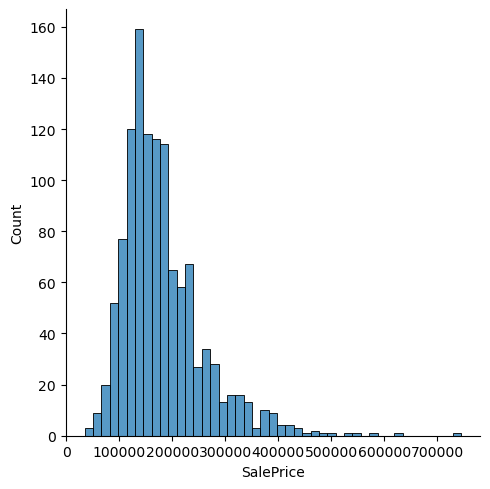

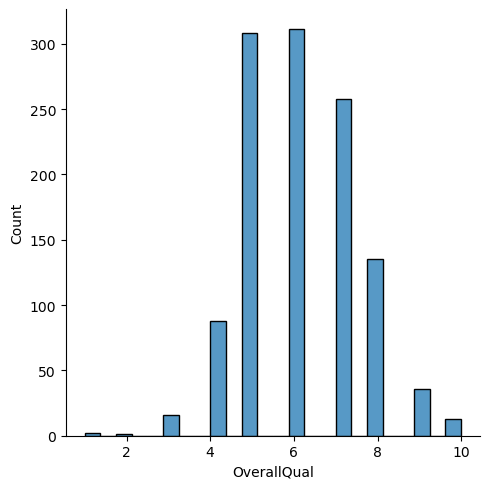

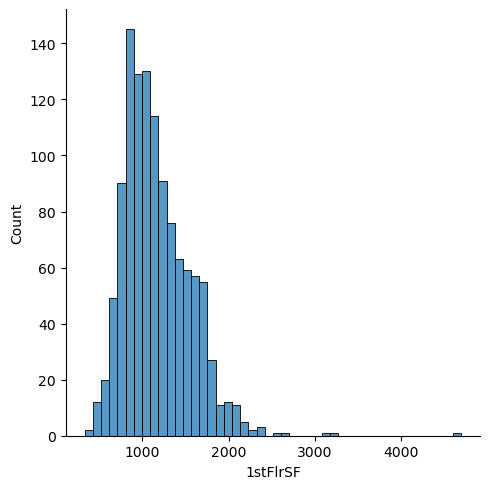

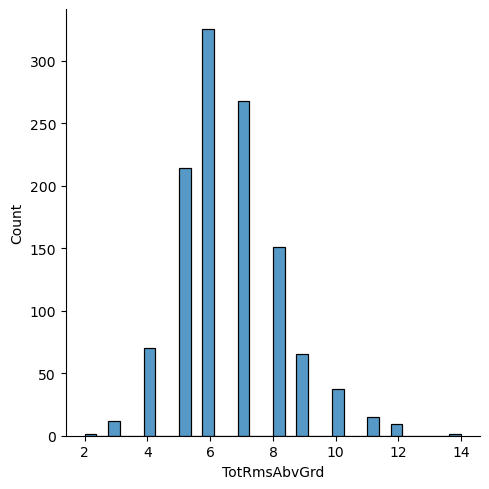

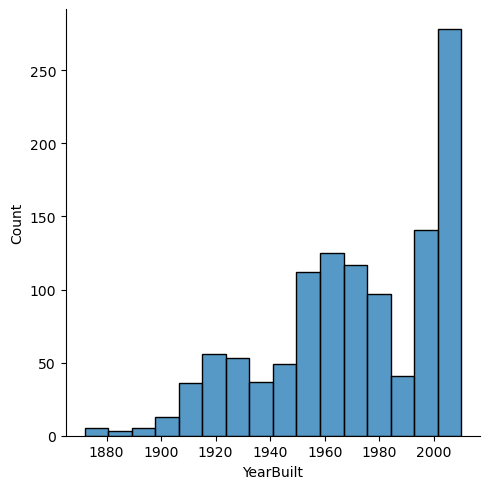

In [102]:
for column in df_train.columns:
    sns.displot(data=df_train, x=column)

## Correlacion

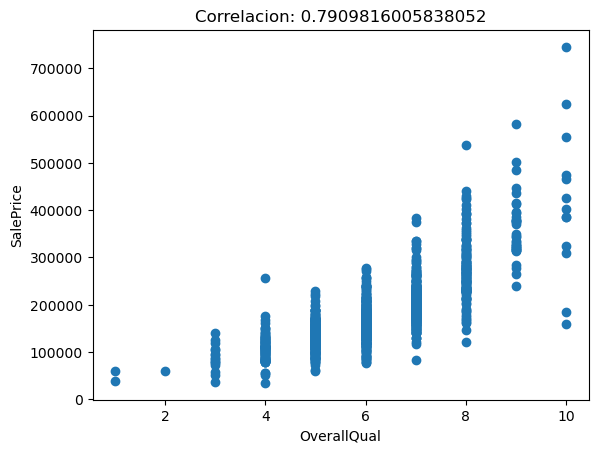

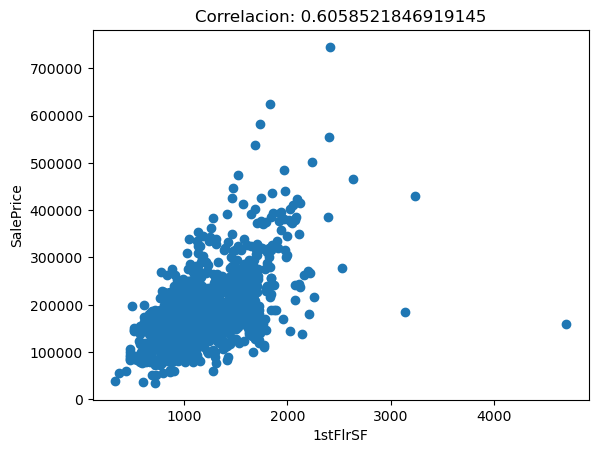

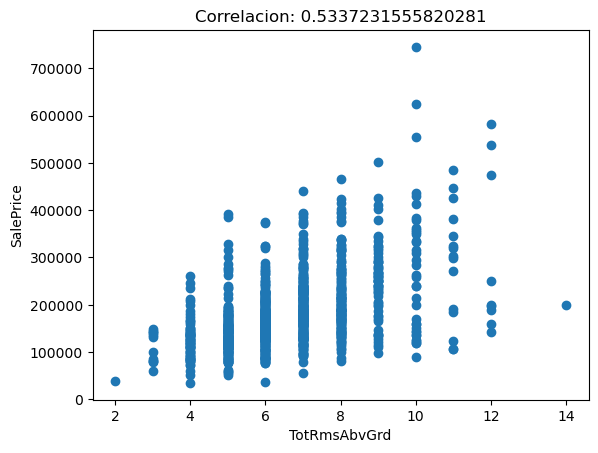

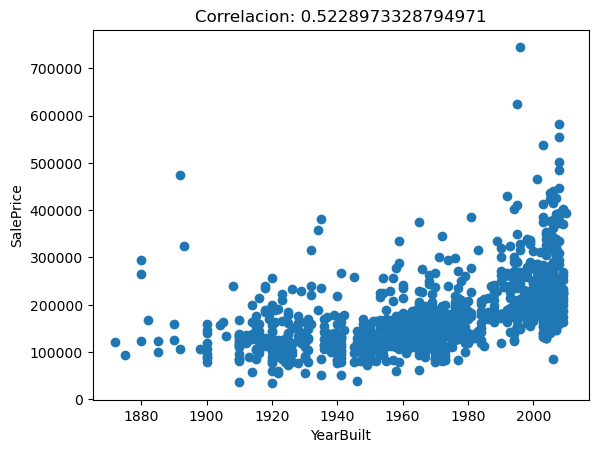

In [113]:
N=len(df_train.index)
for column in df_train.columns:
    if column != y_var:
        plt.scatter(df_train[column], df_train[y_var])
        plt.xlabel(column)
        plt.ylabel(y_var)
        plt.title(f"Correlacion: {df[column].corr(df[y_var])}")
        plt.show()

### Las variables con Mayor correlacion son OverallQual y 1stFlrSF

In [299]:
def linear_regression(x, y, epochs, imprimir_error_cada, learning_rate):
    matrix = np.hstack([x, np.atleast_2d(np.ones(len(x))).T])
    B = np.random.rand(2,1)
    results = []
    errors = []
    for i in range(1,epochs+1):
        y_pred=np.dot(matrix, B)
        error=1/(2*y.shape[0])*((y_pred - y)**2).sum()
        errors.append(error)
        results.append(B)
        if (not i % imprimir_error_cada):
            print(f"{i}. Error {error}")
        B = B-learning_rate*np.array([[(1/y.shape[0])*((y_pred - y)*x).sum()], [(1/y.shape[0])*(y_pred - y).sum()]])
    return errors, results
    

In [283]:
def error_graph(errors, column):
    plt.scatter(np.arange(len(errors)), errors)
    plt.xlabel("Iteracion")
    plt.ylabel("Error")
    plt.title(column)
    plt.show()

In [338]:
def graph_models(models, n, independent_var, dependent_var, x_min, x_max):
    for j in range(len(models)):  # or range(len(theta))
            x = np.linspace(x_min,x_max,100)
            y = x*models[j][0]+models[j][1]
            if (not j % n):
                name =f"{dependent_var}={models[j][0]}{independent_var}+{models[j][1]}"
                plt.plot(x, y, '-r', label=name)
                plt.scatter(df_train[independent_var], df_train[dependent_var])
                plt.title(f"Graph of {name}")
                plt.xlabel(independent_var, color='#1C2833')
                plt.ylabel(dependent_var, color='#1C2833')
                plt.legend(loc='upper left')
                plt.grid()
                plt.show()      

In [327]:

#scaler_X=StandardScaler()
#scaler_X.fit(x)
#scaled_X = scaler_X.transform(x)
#scaler_y=StandardScaler()
#scaler_y.fit(y)
#scaled_y = scaler_y.transform(y)

In [343]:
independent_var = "OverallQual"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
learning_rate =0.04
imprimir_error_cada=4
epochs=10
errors,results = linear_regression(x, y, epochs, imprimir_error_cada, learning_rate)

4. Error 2302045891.2073336
8. Error 1368728930.9612322


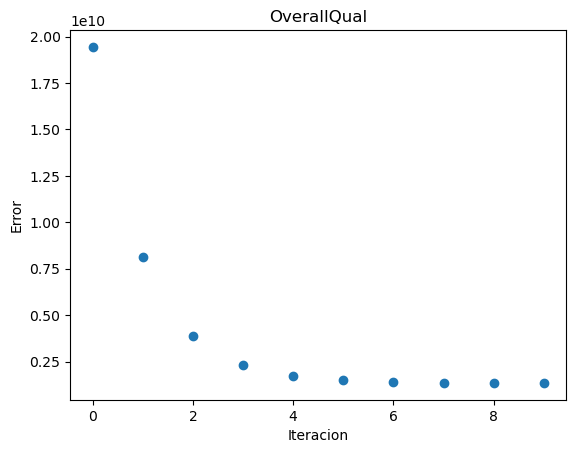

In [344]:
error_graph(errors, independent_var)

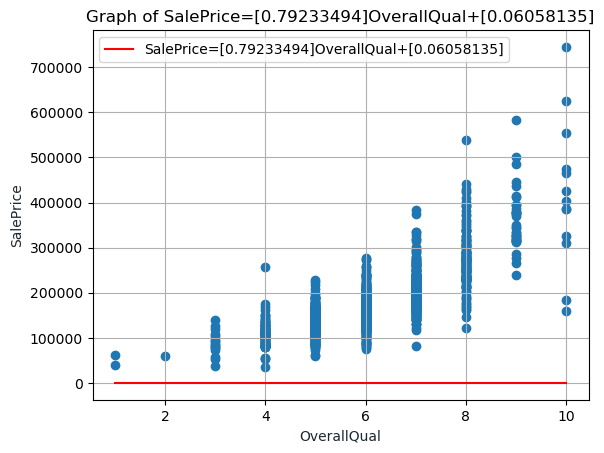

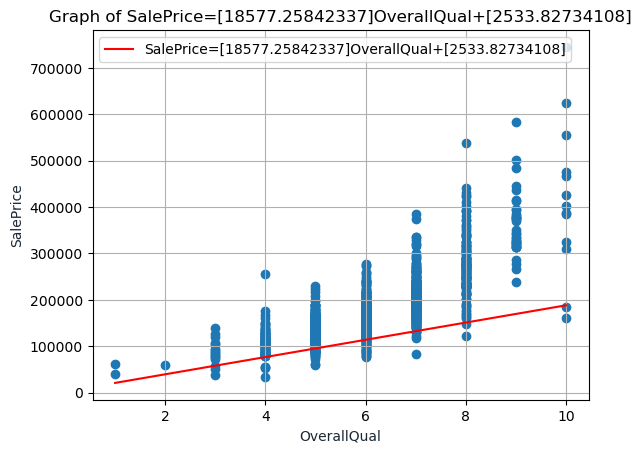

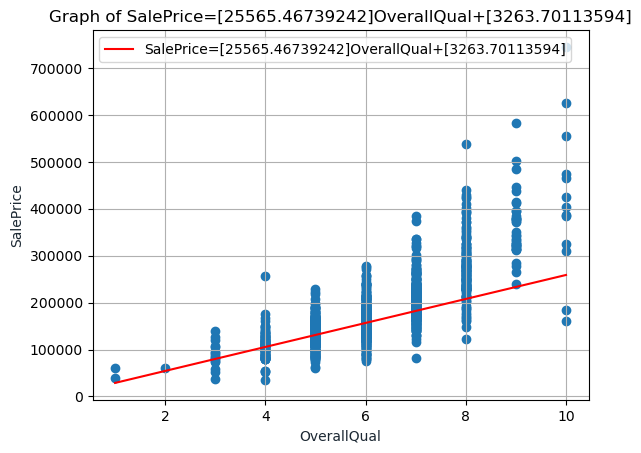

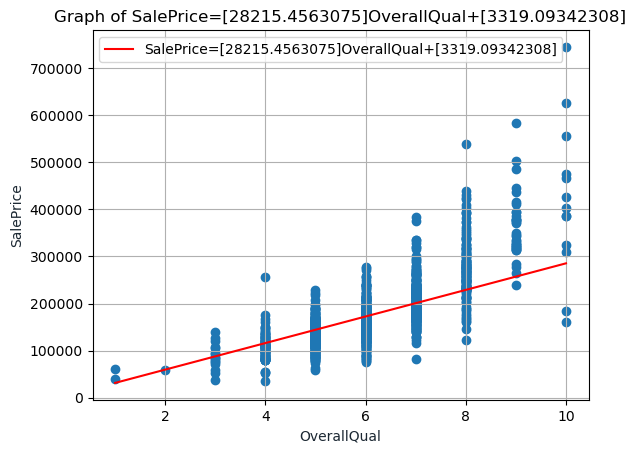

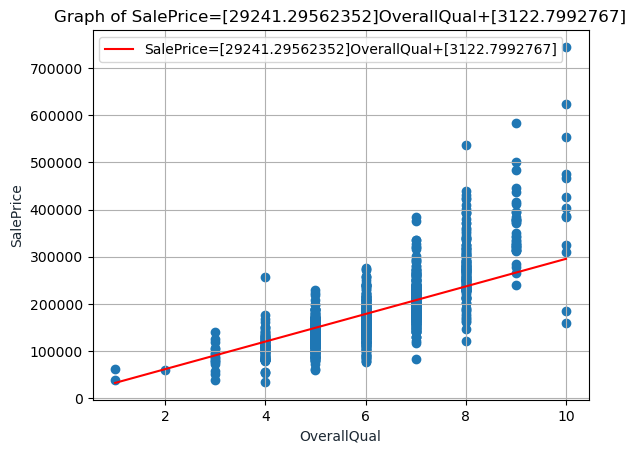

In [345]:
graph_models(results, 2, independent_var, dependent_var, data_info[independent_var]["min"], data_info[independent_var]["max"])

In [347]:
independent_var = "1stFlrSF"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
learning_rate =0.04
imprimir_error_cada=4
epochs=5
errors,results = linear_regression(x, y, epochs, imprimir_error_cada, learning_rate)

4. Error 8.64108180876142e+38


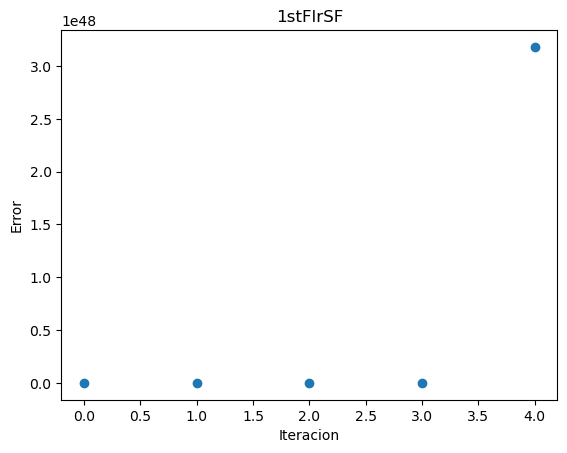

In [349]:
error_graph(errors, independent_var)

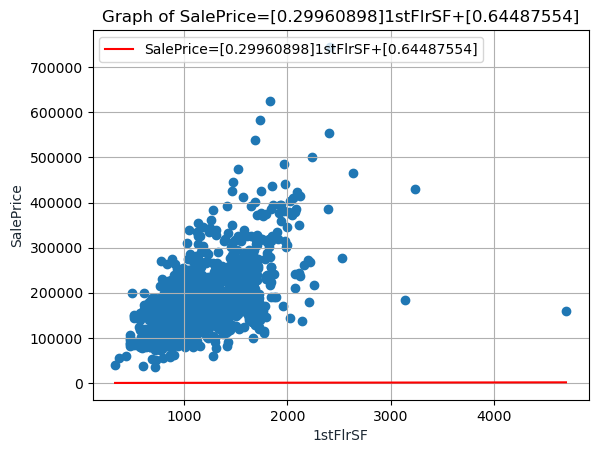

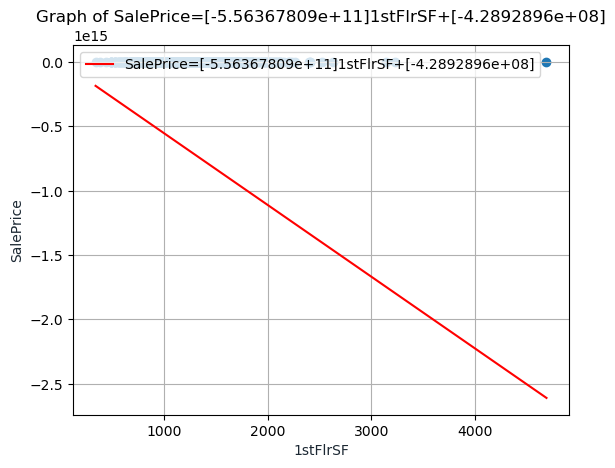

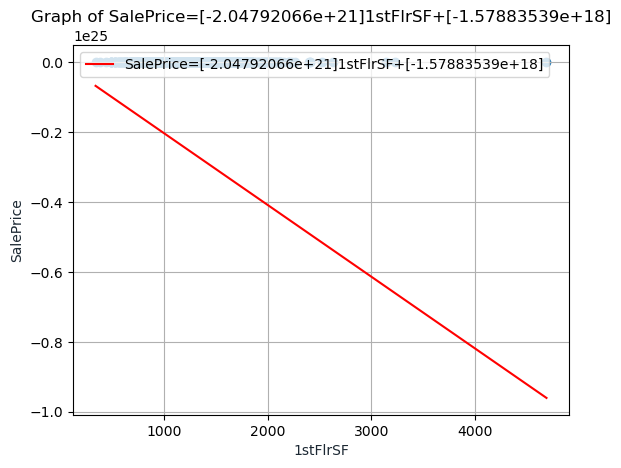

In [350]:
graph_models(results, 2, independent_var, dependent_var, data_info[independent_var]["min"], data_info[independent_var]["max"])

## Modelo Con ScikitLearn

In [249]:
independent_var = "OverallQual"
dependent_var = "SalePrice"
y = np.atleast_2d(df_train[dependent_var].values).T
x = np.atleast_2d(df_train[independent_var].values).T
reg_model = LinearRegression()
reg_model.fit(x,y)

LinearRegression()

In [251]:
reg_model.intercept_

array([-90233.22290028])

In [252]:
reg_model.coef_

array([[44379.87767098]])

In [250]:
r2_score(y, reg_model.predict(x))

0.6170962665508342

In [351]:
# TODO -> Revisar porque la variable 1stFlrSF esta mal
# TODO -> Hacer la funcion que compara los 3 modelos y con eso terminas